In [2]:
%load_ext autoreload
%autoreload 2

import importlib
import logging
import sys

# Import the necessary libraries for plotting
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

# Custom matplotlib style for the documentation
plt.style.use("../macrostat.mplstyle")
# We show the logging output in the notebook
importlib.reload(logging)
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# (Visual) Causality Analysis with MacroStat

This section of the documentation is dedicated to the `causality` module of macrostat, whose purpose is to provide simple means of building a (weighted) directed graph of the interrelations of different variables, parameters, and scenarios in a model. The inspiration for this comes from {cite:t}`FennellEtAl2016ItPossibleVisualise`'s article "Is It Possible to Visualise Any Stock Flow Consistent Model as a Directed Acyclic Graph?"

## The Causality Module

MacroStat's causality analysis is based on a core `CausalityAnalyzer` class together with specific child class implementing different variations. At the time of writing, the implemented class is the `DocstringCausalityAnalyzer` that relies on the inclusion og "Dependency" and "Sets" titles in the docstrings of the function methods

```{eval-rst}
.. toctree::
    :maxdepth: 2

    Causality Base Class <causality/causality.rst>
    Docstring Causality <causality/docstring_causality.rst>
```

## Docstring Causality

As the name implies, the `DocstringCausalityAnalyzer` bases its analysis on the model methods' docstrings. Specficially, it checks for each method called by the `.step()` method of a given behavioral class, the submethods docstring for the "Dependency" and "Sets" section to construct an adjacency matrix with ones for each dependency per sets, and zeros otherwise. To illustrate this, let us consider the model [SIMEX](../models/GL06/GL06SIMEX.ipynb)

In [5]:
from macrostat.models import get_model
from macrostat.causality import DocstringCausalityAnalyzer

Using the analyzer is straightforward: supply a given model class and execute the `.analyze()` function to compute the adjacency matrix

In [7]:
ModelClass = get_model("GL06SIMEX")
analysis = DocstringCausalityAnalyzer(ModelClass)
adjacency_matrix = analysis.analyze()

{cite:t}`FennellEtAl2016ItPossibleVisualise` note that all SFC models should be representable by a directed acyclic graph. By construction our graph is directed, but to test that it is also acyclic, we have implemented a method in the Analyzer:

In [10]:
cycles = analysis.check_for_cycles()
print(f"Found {len(cycles)} cycles in the model")

Found 0 cycles in the model


To get a feel for the adjacency matrix, we can plot it as a heatmap where the y-axis represents the source, and the x-axis the target. In other words, for the state variable on the x-axis the coloured squares indicate it depends on the relevant y-axis item. The heatmap is sorted by trophic levels, which is the reason it has a y=x appearance that can be read from left to right and matches the model description.

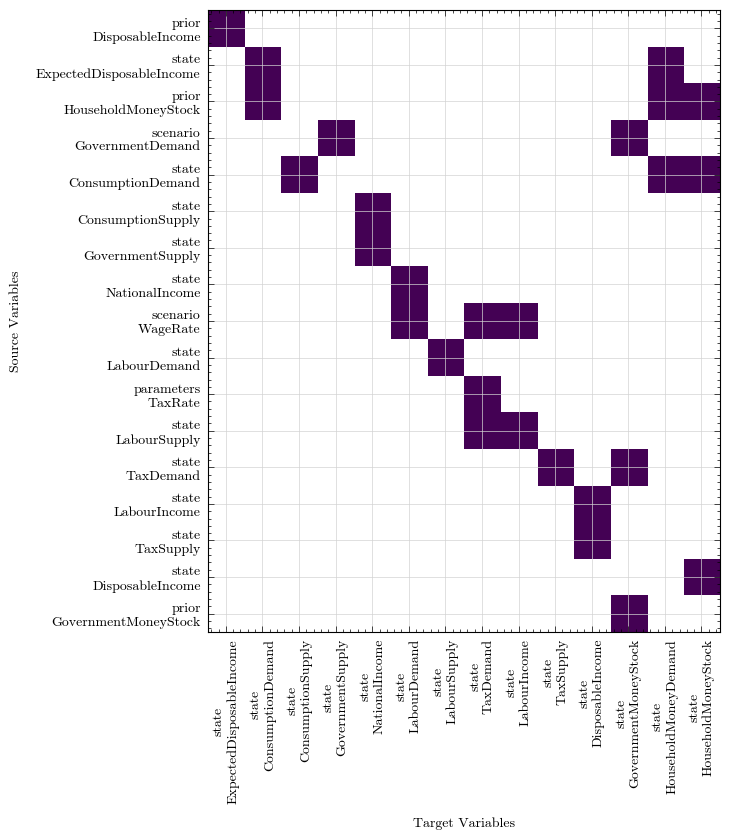

In [62]:
fig, ax = analysis.plot_heatmap()

Most of the further plotting and analysis functionality is open to extension by interested contributors. There is one further function `plot_with_cytoscape` that generates an interactive graphic with a network graph (also sorted trophically) of the given model